In [1]:
import numpy as np
import xarray as xr
from xarray import DataArray, Dataset, Coordinates

In [7]:

# # @title Data retrieval
# import os, requests

# fname = []
# for j in range(3):
#   fname.append('steinmetz_part%d.npz'%j)
# url = ["https://osf.io/agvxh/download"]
# url.append("https://osf.io/uv3mw/download")
# url.append("https://osf.io/ehmw2/download")

# for j in range(len(url)):
#   if not os.path.isfile(fname[j]):
#     try:
#       r = requests.get(url[j])
#     except requests.ConnectionError:
#       print("!!! Failed to download data !!!")
#     else:
#       if r.status_code != requests.codes.ok:
#         print("!!! Failed to download data !!!")
#       else:
#         with open(fname[j], "wb") as fid:
#           fid.write(r.content)

KeyboardInterrupt: 

In [18]:
'U' in str(dset[var[0]].dtype)

True

In [10]:
for var in dset.data_vars.items():
    var

In [2]:
dat = np.load('../data/steinmetz_part1.npz', allow_pickle=True)['dat']
dat

array([{'spks': array([[[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 1, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 1],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0]],

              ...,

              [[0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               [0, 0, 0, ..., 0, 0, 0],
               ...,
               [0, 0, 0, ..., 0, 0, 0],
     

In [3]:
dd = dat[0]

In [7]:
for key in sorted(dd):
    if hasattr(dd[key], 'shape'):
        print(key, dd[key].shape)
    else:
        print(key)



active_trials (364,)
bin_size
brain_area (734,)
ccf (734, 3)
ccf_axes
cellid_orig (1085,)
contrast_left (214,)
contrast_left_passive (150,)
contrast_right (214,)
contrast_right_passive (150,)
date_exp
face (1, 214, 250)
face_passive (1, 150, 250)
feedback_time (214, 1)
feedback_type (214,)
gocue (214, 1)
licks (1, 214, 250)
licks_passive (1, 150, 250)
mouse_name
prev_reward (214, 1)
pupil (3, 214, 250)
pupil_passive (3, 150, 250)
reaction_time (214, 2)
response (214,)
response_time (214, 1)
spks (734, 214, 250)
spks_passive (734, 150, 250)
stim_onset
trough_to_peak (734,)
wheel (1, 214, 250)
wheel_passive (1, 150, 250)


13

In [95]:
%pip install xarray netCDF4

  Obtaining dependency information for netCDF4 from https://files.pythonhosted.org/packages/f0/ef/39f1e32c623abbcff8fef81e484abafc74779388144540b804d96f0657cc/netCDF4-1.6.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cftime from https://files.pythonhosted.org/packages/a8/d2/75554106ea5bd1d44c73d354155395846d3833a5effe3a8660adde385288/cftime-1.6.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.6 MB 991.0 kB/s eta 0:00:07
   --- ------------------------------------ 0.5/6.6 MB 8.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.0/6.6 MB 13.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.0/6.6 MB 13.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.4/6.6 MB 12.6 MB/s eta 0:00:01
   ------------------- -------------------- 3.1/6.6 MB 14.3 MB/s eta 0:00:01
   -------------------- ------------------- 3.3/6.6 MB 

In [5]:
dsets = []
for dd in dat:
    assert list(dd['ccf_axes']) == ['ap', 'dv', 'lr']
    dset = Dataset(
        dict(
            # Stimulus Data
            contrast_left = DataArray(
                data=(np.concatenate(
                    (dd['contrast_left'], dd['contrast_left_passive']),
                ) * 100).astype(np.int8),
                dims=('trial',)
            ),
            contrast_right = DataArray(
                data=(np.concatenate(
                    (dd['contrast_right'], dd['contrast_right_passive']),
                ) * 100).astype(np.int8),
                dims=('trial',)
            ),
            gocue = DataArray(
                data=np.concatenate((dd['gocue'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            stim_onset = DataArray(
                data=np.repeat([dd['stim_onset']], repeats=dd['active_trials'].shape[0]),
                dims=('trial'),
            ),
            feedback_type = DataArray(
                data=np.concatenate((dd['feedback_type'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            feedback_time = DataArray(
                data=np.concatenate((dd['feedback_time'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            response_type = DataArray(
                data=np.concatenate((dd['response'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            response_time = DataArray(
                data=np.concatenate((dd['response_time'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            reaction_type = DataArray(
                data=np.concatenate((dd['reaction_time'][:, 1], [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            reaction_time = DataArray(
                data=np.concatenate((dd['reaction_time'][:, 0], [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            prev_reward = DataArray(
                data=np.concatenate((dd['prev_reward'].squeeze(), [np.nan] * dd['licks_passive'].shape[1])), 
                dims=('trial',),
            ),
            active_trials = DataArray(data=dd['active_trials'], dims=('trial',)),

            # Wheel data
            wheel = DataArray(
                data=np.concatenate(
                    (dd['wheel'].squeeze(), dd['wheel_passive'].squeeze()), 
                    axis=0,
                ).astype(np.int8),
                dims=('trial', 'time')
            ),

            # Licks data
            licks = DataArray(
                data=np.concatenate(
                    (dd['licks'].squeeze(), dd['licks_passive'].squeeze()),
                    axis=0,
                ).astype(np.int8),
                dims=('trial', 'time'),
            ),

            # Pupil data
            pupil_x = DataArray(
                data=np.concatenate(
                    (dd['pupil'][0, :, :], dd['pupil_passive'][0, :, :]),
                    axis=0,
                ),
                dims=('trial', 'time')
            ),
            pupil_y = DataArray(
                data=np.concatenate(
                    (dd['pupil'][1, :, :], dd['pupil_passive'][1, :, :]),
                    axis=0,
                ),
                dims=('trial', 'time')
            ),
            pupil_area = DataArray(
                data=np.concatenate(
                    (dd['pupil'][2, :, :], dd['pupil_passive'][2, :, :]),
                    axis=0,
                ),
                dims=('trial', 'time')
            ),

            # Face data
            face = DataArray(
                data=np.concatenate(
                    (dd['face'].squeeze(), dd['face_passive'].squeeze()),
                    axis=0,
                ),
                dims=('trial', 'time'),
            ),

            # Spike data
            spks = DataArray(
                data=np.concatenate(
                    (dd['spks'], dd['spks_passive']),
                    axis=1,
                ).astype(np.int8), 
                dims=('cell', 'trial', 'time')
            ),
            trough_to_peak = DataArray(data=dd['trough_to_peak'].astype(np.int8), dims=('cell',)),
            ccf_ap = DataArray(data=dd['ccf'][:, 0], dims=('cell',)),
            ccf_dv = DataArray(data=dd['ccf'][:, 1], dims=('cell',)),
            ccf_lr = DataArray(data=dd['ccf'][:, 2], dims=('cell',)),
            brain_area = DataArray(data=dd['brain_area'], dims=('cell',)),
            
            
        ),
        coords=Coordinates({
            'trial': np.arange(1, dd['active_trials'].shape[0] + 1),
            'time': (np.arange(1, dd['wheel'].shape[-1] + 1) * dd['bin_size']),
            'cell': np.arange(1, dd['spks'].shape[0] + 1),
        }),
        attrs={
            'bin_size': dd['bin_size'],
            'stim_onset': dd['stim_onset'],
        }
    ).expand_dims({
        'mouse': [dd['mouse_name']],
        'session_date': [dd['date_exp']],
    })

    # Compression settings for each variable. 
    # Slower to write, but shrunk data to 6% the original size!
    encodings = {
        'contrast_left':  {'zlib': True, 'complevel': 5},
        'contrast_right': {'zlib': True, 'complevel': 5},
        'gocue':          {'zlib': True, 'complevel': 5},
        'feedback_type':  {'zlib': True, 'complevel': 5},
        'feedback_time':  {'zlib': True, 'complevel': 5},
        'response_type':  {'zlib': True, 'complevel': 5},
        'response_time':  {'zlib': True, 'complevel': 5},
        'reaction_type':  {'zlib': True, 'complevel': 5},
        'reaction_time':  {'zlib': True, 'complevel': 5},
        'prev_reward':    {'zlib': True, 'complevel': 5},
        'active_trials':  {'zlib': True, 'complevel': 5},
        'wheel':          {'zlib': True, 'complevel': 5},
        'licks':          {'zlib': True, 'complevel': 5},
        'pupil_x':        {'zlib': True, 'complevel': 5},
        'pupil_y':        {'zlib': True, 'complevel': 5},
        'pupil_area':     {'zlib': True, 'complevel': 5},
        'face':           {'zlib': True, 'complevel': 5},
        'spks':           {'zlib': True, 'complevel': 5},
        'stim_onset':     {'zlib': True, 'complevel': 5},
        'trough_to_peak': {'zlib': True, 'complevel': 5},
        'ccf_ap':         {'zlib': True, 'complevel': 5},
        'ccf_dv':         {'zlib': True, 'complevel': 5},
        'ccf_lr':         {'zlib': True, 'complevel': 5},
        # 'brain_area':     {'zlib': True, 'complevel': 5},
    }
    dset.to_netcdf(
        path=f'../data/raw_comp/steinmetz_{dd["date_exp"]}_{dd["mouse_name"]}.nc',
        format="NETCDF4",
        engine="netcdf4",
        encoding=encodings,   
    )
    dsets.append(dset)

dsets[0]

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 364, time: 250, cell: 734)
Coordinates:
  * mouse           (mouse) object 'Cori'
  * session_date    (session_date) object '2016-12-14'
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 358 359 360 361 362 363 364
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int32 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
Data variables: (12/24)
    contrast_left   (mouse, session_date, trial) int8 100 0 100 0 ... 0 25 100
    contrast_right  (mouse, session_date, trial) int8 0 50 50 0 ... 25 50 0 100
    gocue           (mouse, session_date, trial) float64 1.027 0.8744 ... nan
    stim_onset      (mouse, session_date, trial) float64 0.5 0.5 0.5 ... 0.5 0.5
    feedback_type   (mouse, session_date, trial) float64 1.0 1.0 1.0 ... nan nan
    feedback_time   (mouse, session_date, trial) float64 1.187 1.438 ... nan nan
    ...              ...
    spks            (mouse, session_date, cell, trial, time) int8 0 0 0 ... 0 0
    trough_to_peak  (mouse, session_date, cell) int8 19 19 10 17 ... 16 8 20 10
    ccf_ap          (mouse, session_date, cell) float64 4.09e+03 ... 8.914e+03
    ccf_dv          (mouse, session_date, cell) float64 2.445e+03 ... 4.094e+03
    ccf_lr          (mouse, session_date, cell) float64 5.012e+03 ... 3.021e+03
    brain_area      (mouse, session_date, cell) <U4 'ACA' 'MOs' ... 'VISp' 'DG'
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [113]:
xr.open_dataset('../data/raw_comp/steinmetz_2016-12-14_Cori.nc')[['contrast_left', 'contrast_right']].to_dataframe()

,contrast_left,contrast_right
trial,,
1,100,0
2,0,50
3,100,50
4,0,0
5,50,100
...,...,...
360,50,25
361,50,25
362,0,50


In [72]:
dd['brain_area']

array(['ACA', 'MOs', 'ACA', 'LS', 'MOs', 'ACA', 'root', 'MOs', 'MOs',
       'LS', 'LS', 'LS', 'MOs', 'LS', 'LS', 'LS', 'ACA', 'MOs', 'ACA',
       'MOs', 'ACA', 'LS', 'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'MOs', 'LS',
       'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'MOs', 'LS', 'ACA', 'LS', 'MOs',
       'ACA', 'LS', 'LS', 'ACA', 'ACA', 'LS', 'LS', 'ACA', 'ACA', 'LS',
       'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'LS', 'MOs', 'MOs', 'ACA',
       'ACA', 'LS', 'MOs', 'ACA', 'LS', 'LS', 'MOs', 'MOs', 'LS', 'LS',
       'LS', 'ACA', 'MOs', 'MOs', 'LS', 'ACA', 'ACA', 'LS', 'LS', 'ACA',
       'LS', 'MOs', 'ACA', 'LS', 'ACA', 'LS', 'MOs', 'MOs', 'MOs', 'LS',
       'MOs', 'LS', 'ACA', 'ACA', 'ACA', 'MOs', 'LS', 'ACA', 'ACA', 'LS',
       'ACA', 'LS', 'MOs', 'MOs', 'MOs', 'ACA', 'LS', 'ACA', 'ACA', 'MOs',
       'root', 'MOs', 'MOs', 'MOs', 'LS', 'MOs', 'LS', 'ACA', 'ACA',
       'ACA', 'LS', 'LS', 'ACA', 'MOs', 'LS', 'MOs', 'ACA', 'ACA', 'ACA',
       'MOs', 'ACA', 'ACA', 'MOs', 'ACA', 'MOs', 'LS', 'LS

In [40]:
dd['reaction_time']

array([[ 1.70e+02,  1.00e+00],
       [ 2.30e+02, -1.00e+00],
       [ 2.00e+02,  1.00e+00],
       [ 8.60e+02,  1.00e+00],
       [ 1.40e+02,  1.00e+00],
       [ 1.34e+03,  1.00e+00],
       [ 7.40e+02,  1.00e+00],
       [ 9.90e+02, -1.00e+00],
       [ 1.18e+03,  1.00e+00],
       [ 2.00e+02,  1.00e+00],
       [ 2.90e+02,  1.00e+00],
       [ 1.41e+03, -1.00e+00],
       [ 1.60e+02,  1.00e+00],
       [ 1.40e+02,  1.00e+00],
       [ 2.20e+02,  1.00e+00],
       [ 1.70e+02, -1.00e+00],
       [ 3.40e+02, -1.00e+00],
       [ 1.90e+02, -1.00e+00],
       [ 9.20e+02, -1.00e+00],
       [ 1.36e+03, -1.00e+00],
       [ 1.59e+03, -1.00e+00],
       [ 1.00e+03,  1.00e+00],
       [ 1.74e+03,  1.00e+00],
       [      inf,  0.00e+00],
       [ 1.80e+02,  1.00e+00],
       [ 4.50e+02,  1.00e+00],
       [ 9.10e+02, -1.00e+00],
       [ 1.20e+02, -1.00e+00],
       [ 1.90e+02,  1.00e+00],
       [ 1.20e+02,  1.00e+00],
       [ 2.00e+02, -1.00e+00],
       [      inf,  0.00e+00],
       [

In [30]:
 dd['response']

array([ 1., -1.,  1.,  0.,  1.,  1., -1., -1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1., -1.,  0., -1., -1., -1.,  0.,  1.,  1.,  0.,  1.,  1.,
        0., -1.,  1., -1., -1.,  0., -1.,  1., -1.,  0.,  0., -1., -1.,
        1.,  1., -1., -1., -1.,  0., -1., -1.,  1., -1.,  1., -1., -1.,
        0.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  0., -1.,  1.,
       -1., -1.,  0., -1.,  0.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1.,  0.,  0.,  1., -1., -1.,  1.,  0.,  0.,  1., -1.,  1.,  1.,
        1.,  1.,  0., -1.,  1., -1.,  0.,  1.,  0., -1.,  1., -1.,  0.,
       -1.,  0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,
        1.,  0.,  1.,  0.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  0.,
       -1.,  0., -1., -1., -1.,  0.,  0.,  1.,  0., -1.,  1., -1., -1.,
        1., -1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1., -1.,  0., -1.,
        1., -1.,  0.,  0.,  0.,  1.,  1.,  0., -1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0., -1.,  1.,  1.,  1.,  0.,  0

In [22]:
dd['gocue']

array([[1.02721625],
       [0.87441381],
       [0.82521303],
       [0.76161202],
       [0.66201043],
       [1.18681879],
       [0.58800925],
       [0.60640954],
       [0.5912093 ],
       [1.07121695],
       [0.64601017],
       [1.18161871],
       [0.96601527],
       [1.07081695],
       [1.01921612],
       [0.54640858],
       [0.74681178],
       [0.98841563],
       [0.76841212],
       [1.12161776],
       [1.0492166 ],
       [0.7668121 ],
       [1.00961597],
       [0.9428149 ],
       [0.84121328],
       [0.89201409],
       [0.52760828],
       [0.82801307],
       [0.82441302],
       [0.52800829],
       [0.99361571],
       [0.56200883],
       [0.94721497],
       [0.7856124 ],
       [0.87681385],
       [0.48680763],
       [0.53000832],
       [0.84881341],
       [0.96001518],
       [1.11761769],
       [0.50400791],
       [1.05081663],
       [0.9176145 ],
       [0.76321204],
       [0.51720812],
       [0.51640811],
       [0.99801578],
       [0.681

In [11]:
dd['brain_area']

array(['ACA', 'MOs', 'ACA', 'LS', 'MOs', 'ACA', 'root', 'MOs', 'MOs',
       'LS', 'LS', 'LS', 'MOs', 'LS', 'LS', 'LS', 'ACA', 'MOs', 'ACA',
       'MOs', 'ACA', 'LS', 'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'MOs', 'LS',
       'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'MOs', 'LS', 'ACA', 'LS', 'MOs',
       'ACA', 'LS', 'LS', 'ACA', 'ACA', 'LS', 'LS', 'ACA', 'ACA', 'LS',
       'MOs', 'MOs', 'ACA', 'MOs', 'MOs', 'LS', 'MOs', 'MOs', 'ACA',
       'ACA', 'LS', 'MOs', 'ACA', 'LS', 'LS', 'MOs', 'MOs', 'LS', 'LS',
       'LS', 'ACA', 'MOs', 'MOs', 'LS', 'ACA', 'ACA', 'LS', 'LS', 'ACA',
       'LS', 'MOs', 'ACA', 'LS', 'ACA', 'LS', 'MOs', 'MOs', 'MOs', 'LS',
       'MOs', 'LS', 'ACA', 'ACA', 'ACA', 'MOs', 'LS', 'ACA', 'ACA', 'LS',
       'ACA', 'LS', 'MOs', 'MOs', 'MOs', 'ACA', 'LS', 'ACA', 'ACA', 'MOs',
       'root', 'MOs', 'MOs', 'MOs', 'LS', 'MOs', 'LS', 'ACA', 'ACA',
       'ACA', 'LS', 'LS', 'ACA', 'MOs', 'LS', 'MOs', 'ACA', 'ACA', 'ACA',
       'MOs', 'ACA', 'ACA', 'MOs', 'ACA', 'MOs', 'LS', 'LS

In [245]:
dsets = []
for idx, dd in enumerate(dat[:1], start=1):
    dset = Dataset(
        dict(
            spks = DataArray(data=dd['spks'], dims=('cell', 'trial', 'time')),
            wheel = DataArray(data=dd['wheel'].squeeze(), dims=('trial', 'time')),
            pupil_x = DataArray(data=dd['pupil'][0, :, :], dims=('trial', 'time')),
            pupil_y = DataArray(data=dd['pupil'][1, :, :], dims=('trial', 'time')),
            pupil_area = DataArray(data=dd['pupil'][2, :, :], dims=('trial', 'time')),
            response = DataArray(data=dd['response'], dims=('trial',)),
            response_time = DataArray(data=dd['response_time'].squeeze(), dims=('trial')),
            contrast_left = DataArray(data=dd['contrast_left'], dims=('trial',)),
            contrast_right = DataArray(data=dd['contrast_right'], dims=('trial',)),
            brain_area = DataArray(data=dd['brain_area'], dims=('cell',)),
            feedback_time = DataArray(data=dd['feedback_time'].squeeze(), dims=('trial',)),
            feedback_type = DataArray(data=dd['feedback_type'], dims=('trial',)),
            gocue = DataArray(data=dd['gocue'].squeeze(), dims=('trial',)),
            trough_to_peak = DataArray(data=dd['trough_to_peak'], dims=('cell',)),
            # active_trials
            
            

        ),
        coords=Coordinates({
            'trial': np.arange(1, dd['response'].shape[0] + 1),
            'time': (np.arange(1, dd['wheel'].shape[-1] + 1) * dd['bin_size']),
            'cell': np.arange(1, dd['spks'].shape[0] + 1),
        }),
        attrs={
            'bin_size': dd['bin_size'],
            'stim_onset': dd['stim_onset'],
            'date_exp': dd['date_exp'],
        }
    ).expand_dims({
        'session': [idx], 
        'mouse': [dd['mouse_name']]
    })
    dsets.append(dset)

dsets[0]

<xarray.Dataset>
Dimensions:         (session: 1, mouse: 1, trial: 214, time: 250, cell: 734)
Coordinates:
  * session         (session) int32 1
  * mouse           (mouse) object 'Cori'
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 208 209 210 211 212 213 214
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int32 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
Data variables: (12/14)
    spks            (session, mouse, cell, trial, time) int8 0 0 0 0 ... 0 0 0 0
    wheel           (session, mouse, trial, time) float64 -1.0 0.0 ... 3.0 2.0
    pupil_x         (session, mouse, trial, time) float64 0.1658 ... 0.1838
    pupil_y         (session, mouse, trial, time) float64 0.8129 ... 0.9862
    pupil_area      (session, mouse, trial, time) float64 0.6642 ... 0.6108
    response        (session, mouse, trial) float64 1.0 -1.0 1.0 ... 0.0 0.0 1.0
    ...              ...
    contrast_right  (session, mouse, trial) float64 0.0 0.5 0.5 ... 1.0 1.0 1.0
    brain_area      (session, mouse, cell) <U4 'ACA' 'MOs' 'ACA' ... 'VISp' 'DG'
    feedback_time   (session, mouse, trial) float64 1.187 1.438 ... 2.282 1.474
    feedback_type   (session, mouse, trial) float64 1.0 1.0 1.0 ... -1.0 -1.0
    gocue           (session, mouse, trial) float64 1.027 0.8744 ... 0.986
    trough_to_peak  (session, mouse, cell) float64 19.0 19.0 10.0 ... 20.0 10.0
Attributes:
    bin_size:    0.01
    stim_onset:  0.5
    date_exp:    2016-12-14

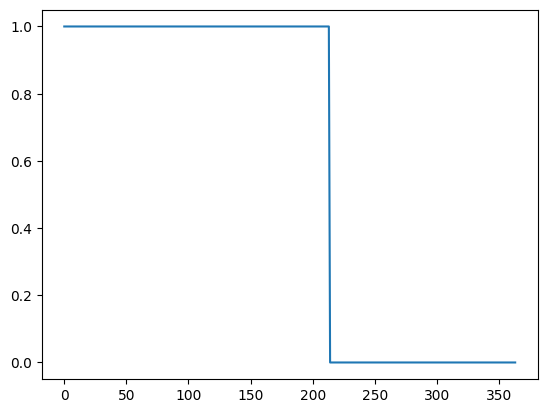

In [247]:
from matplotlib import pyplot as plt


plt.plot(dd['active_trials'])

In [223]:
dsets[3]

<xarray.Dataset>
Dimensions:         (session: 1, mouse: 1, trial: 249, time: 250, cell: 1769)
Coordinates:
  * session         (session) int32 4
  * mouse           (mouse) object 'Forssmann'
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 243 244 245 246 247 248 249
  * time            (time) int32 10 20 30 40 50 60 ... 2460 2470 2480 2490 2500
  * cell            (cell) int32 1 2 3 4 5 6 7 ... 1764 1765 1766 1767 1768 1769
Data variables:
    spks            (session, mouse, cell, trial, time) int8 0 0 0 0 ... 0 0 0 0
    wheel           (session, mouse, trial, time) float64 0.0 -1.0 ... 0.0 0.0
    pupil_x         (session, mouse, trial, time) float64 0.7282 ... 0.01723
    pupil_y         (session, mouse, trial, time) float64 0.2824 ... -0.6252
    pupil_area      (session, mouse, trial, time) float64 -2.069 ... -0.3156
    response        (session, mouse, trial) float64 -1.0 -1.0 -1.0 ... 0.0 0.0
    response_time   (session, mouse, trial) float64 1.045 0.9663 ... 2.33 2.431
    contrast_left   (session, mouse, trial) float64 0.0 0.0 0.5 ... 1.0 1.0 1.0
    contrast_right  (session, mouse, trial) float64 1.0 0.5 0.25 ... 0.0 0.0 0.0

In [231]:
dd['cellid_orig'].sum()

734

In [210]:
dset.reindex(trial=np.aral, fill_value=)

<xarray.Dataset>
Dimensions:         (session: 1, mouse: 1, trial: 300, time: 250, cell: 983)
Coordinates:
  * session         (session) int32 13
  * mouse           (mouse) object 'Lederberg'
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 294 295 296 297 298 299 300
  * time            (time) int32 10 20 30 40 50 60 ... 2460 2470 2480 2490 2500
  * cell            (cell) int32 1 2 3 4 5 6 7 8 ... 977 978 979 980 981 982 983
Data variables:
    spks            (session, mouse, cell, trial, time) int8 0 0 0 0 ... 0 0 0 0
    wheel           (session, mouse, trial, time) float64 0.0 -1.0 ... -1.0 -1.0
    pupil_x         (session, mouse, trial, time) float64 0.07968 ... 0.04288
    pupil_y         (session, mouse, trial, time) float64 0.1103 ... 0.3148
    pupil_area      (session, mouse, trial, time) float64 -0.04338 ... -1.153
    response        (session, mouse, trial) float64 -1.0 0.0 1.0 ... 0.0 0.0 0.0
    response_time   (session, mouse, trial) float64 0.7321 2.048 ... 2.263 2.091
    contrast_left   (session, mouse, trial) float64 0.0 0.0 0.5 ... 1.0 1.0 1.0
    contrast_right  (session, mouse, trial) float64 0.0 0.0 0.0 ... 0.25 0.25

In [171]:
dset.to_netcdf(path='../data/steinmetz_part1.netcdf')

In [174]:
dset = xr.open_dataset('../data/steinmetz_part1.netcdf')
dset

<xarray.Dataset>
Dimensions:         (cell: 734, trial: 214, time: 250)
Coordinates:
  * cell            (cell) int32 1 2 3 4 5 6 7 8 ... 728 729 730 731 732 733 734
  * time            (time) int32 10 20 30 40 50 60 ... 2460 2470 2480 2490 2500
  * trial           (trial) int32 1 2 3 4 5 6 7 ... 208 209 210 211 212 213 214
Data variables:
    spks            (cell, trial, time) int8 ...
    wheel           (trial, time) float64 ...
    pupil_x         (trial, time) float64 ...
    pupil_y         (trial, time) float64 ...
    pupil_area      (trial, time) float64 ...
    response        (trial) float64 ...
    response_time   (trial) float64 ...
    contrast_left   (trial) float64 ...
    contrast_right  (trial) float64 ...

In [185]:
dset[['contrast_left', 'contrast_right', 'response', 'response_time']].to_dataframe()

,contrast_left,contrast_right,response,response_time
trial,,,,
1,1.00,0.0,1.0,1.150204
2,0.00,0.5,-1.0,1.399503
3,1.00,0.5,1.0,0.949291
4,0.00,0.0,0.0,2.266802
5,0.50,1.0,1.0,0.816776
...,...,...,...,...
210,0.25,1.0,1.0,1.453137
211,0.25,1.0,1.0,1.220359
212,0.25,1.0,0.0,2.306214
